# Binary classification of spam/ham mails with using **LSTM**
## LSTM (Long Short Term Memory)

Long Short-Term Memory networks (LSTMs) are a specialized kind of recurrent neural network (RNN) capable of learning long-term dependencies. Below are some of the fundamental concepts underlying LSTMs:

### 1. **Memory Cells**
- The core component of an LSTM unit is the memory cell, designed to maintain information in memory for long periods. The cell's ability to retain or discard information selectively makes LSTMs suitable for tasks that require remembering or forgetting data over long sequences.

### 2. **Gates**
LSTMs utilize three distinct types of gates to control the flow of information:
   - **Input gate**: Controls how much new information is added to the cell state.
   - **Forget gate**: Determines the amount of information thrown away from the current cell state.
   - **Output gate**: Decides what information to output based on current input and the memory of the cell.

### 3. **Statefulness**
- LSTMs maintain two states throughout time steps:
   - **Cell state**: Acts as the long-term memory, which carries relevant information throughout the processing of the sequence.
   - **Hidden state**: Represents the short-term memory that provides the current output of the LSTM unit at each step.

### 4. **Backpropagation Through Time (BPTT)**
- LSTMs use a specialized form of backpropagation called Backpropagation Through Time, which is essential for learning temporal dependencies. BPTT involves unfolding the LSTM over time steps and applying traditional backpropagation.

### 5. **Advantages Over Standard RNNs**
- **Handling Long-Term Dependencies**: Unlike standard RNNs that fail to capture long-term dependencies due to vanishing gradients, LSTMs are designed to address this through their architecture.
- **Flexibility**: They can learn which data in a sequence is important to remember or ignore, thus enhancing their efficiency and effectiveness in sequence modeling.

### 6. **Challenges and Limitations**
- **Computational Complexity**: Due to their sophisticated architecture, LSTMs are more computationally intensive than standard RNNs, leading to longer training times.
- **Parameter Tuning**: LSTMs involve numerous hyperparameters that need careful tuning to perform optimally, which can be a complex and time-consuming process.

These principles are why LSTMs excel in tasks like speech recognition, text generation, and spam detection, where understanding complex relationships and dependencies over time is crucial.


In [34]:
import tensorflow as tf

print(tf.__version__)
# 1.14.0

tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

2.12.0


2024-05-26 15:59:53.484798: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 15:59:53.485282: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 15:59:53.485572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 15:59:53.486089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 15:59:53.486102: I tensorflow/core/co

True

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
# Open the prepared dataset, and split it into training and testing sets
data:pd.DataFrame = pd.read_csv("./dataset/spameyes_dataset.csv", lineterminator='\n')
print(f"The number of rows in the dataset is {data.shape[0]}")
print(f"The number of columns in the dataset is {data.shape[1]}")
print(data.head())

The number of rows in the dataset is 37685
The number of columns in the dataset is 2
  label                                               text
0  spam  save your money buy getting this thing here yo...
1  spam  save your money buy getting this thing here yo...
2  spam  wall street phenomenon reaps rewards small cap...
3  spam  only our software is guaranteed 100 legal name...
4  spam  rely on us for your online prescription orderi...


In [37]:
# Replace the spam and ham labels with 1 and 0 respectively
data["label"] = data["label"].replace(["spam", "ham"], [1, 0])
print(data)

       label                                               text
0          1  save your money buy getting this thing here yo...
1          1  save your money buy getting this thing here yo...
2          1  wall street phenomenon reaps rewards small cap...
3          1  only our software is guaranteed 100 legal name...
4          1  rely on us for your online prescription orderi...
...      ...                                                ...
37680      1  win $ 300usd and a cruise ! raquel 's casino ,...
37681      1  you have been asked to join kiddin the list ow...
37682      0  anglicization of composers ' names judging fro...
37683      0  re : 6 . 797 , comparative method : n - ary co...
37684      0  re : american - english in australia hello ! i...

[37685 rows x 2 columns]


/tmp/ipykernel_1615/4287341439.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["label"] = data["label"].replace(["spam", "ham"], [1, 0])


In [38]:
print(data.info())
print(f"If there is any missing value in the dataset: {data.isnull().values.any()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37685 entries, 0 to 37684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   37685 non-null  int64 
 1   text    37685 non-null  object
dtypes: int64(1), object(1)
memory usage: 589.0+ KB
None
If there is any missing value in the dataset: False


<Axes: xlabel='label'>

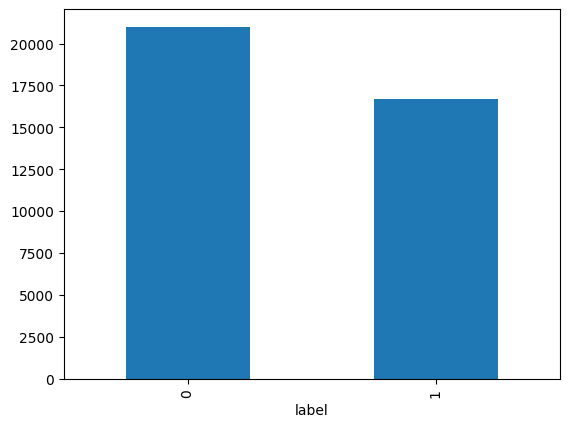

In [39]:
# Plot the distribution of the labels
data["label"].value_counts().plot(kind = "bar")

In [40]:
# Split the dataset into training and testing sets
X:pd.DataFrame = data["text"]
y:pd.DataFrame = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0xCAFECAFE)

# X_train is for training the model, X_test is for testing the model
# y_train is the actual label for the training set, y_test is the actual label for the testing set

# Measure how many columns in the training set and testing set
print(f"The number of rows in the training set is {X_train.shape[0]}")
print(f"The number of rows in the testing set is {X_test.shape[0]}")

The number of rows in the training set is 30148
The number of rows in the testing set is 7537


In [41]:
# With using the Keras Tokenizer, we can convert the text data into sequences
# These processes are called tokenization and integer encoding
tokenizer:Tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded:np.ndarray = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[837, 11, 85, 3717, 16, 2051, 11, 1041, 2, 104, 397, 26, 183, 32, 1929, 258, 7961, 9, 65, 13, 841, 777, 669, 29, 153, 56, 102, 11, 102, 1049, 133, 2, 1979, 907, 1141, 39539], [261, 200, 34, 349, 380, 1224, 593, 399, 1224, 674, 603, 1714, 1623, 3534, 571, 750, 559, 1190, 253, 106, 1353, 1662, 376, 1225, 609, 450, 827, 97781, 1143, 483, 566, 432, 179, 473, 1300, 10, 804, 13, 5, 1106, 318, 666, 318, 707, 566, 432, 179, 666, 318, 707, 566, 432, 179, 666, 318, 707, 566, 432, 179, 483, 566, 432, 179, 473, 1300, 10, 804, 13, 5, 1106, 318, 666, 318, 707, 566, 432, 179, 666, 318, 707, 566, 432, 179, 666, 318, 707, 566, 432, 179, 483, 566, 432, 179, 473, 1300, 10, 804, 13, 5, 1106, 318, 666, 318, 707, 566, 432, 179, 666, 318, 707, 566, 432, 179, 483, 566, 432, 179, 473, 1300, 10, 804, 13, 5, 1106, 318, 483, 566, 432, 179, 473, 1300, 10, 804, 13, 5, 1106, 318, 483, 566, 432, 179, 473, 1300, 10, 804, 13, 5, 1106, 318, 666, 318, 707, 566, 432, 179, 666, 318, 707, 566, 432, 179, 666, 318, 707, 566,

In [42]:
# Let's check which numbers correspond to which words
word_index:dict = tokenizer.word_index
print(f"The number of unique words in the dataset is {len(word_index)}")
print(f"The first 25 words in the dataset are {list(word_index.items())[:25]}")

# As we can see, the number is assigned to the word based on the frequency of the word.
# The lower the number, the more frequent the word is in the dataset

The number of unique words in the dataset is 210306
The first 25 words in the dataset are [('the', 1), ('to', 2), ('of', 3), ('and', 4), ('a', 5), ('in', 6), ('you', 7), ('for', 8), ('is', 9), ('this', 10), ('i', 11), ('that', 12), ('on', 13), ('your', 14), ('be', 15), ('with', 16), ('it', 17), ("'", 18), ('are', 19), ('or', 20), ('as', 21), ('com', 22), ('from', 23), ('have', 24), ('will', 25)]


In [43]:
# However, there are some words that are not so frequent, less than 2 times in the entire dataset for example.
# Let's check how many words are there in the dataset that are not so frequent
threshold:int = 2
total_words_count:int = len(word_index)
rare_words_count:int  = len([word for word, count in tokenizer.word_counts.items() if count < threshold])
print(f"The number of words in the dataset is {total_words_count}")
print(f"The number of words that are not so frequent in the dataset is {rare_words_count}")
print(f"The proportion of the rare words(frequency < {threshold} in the entire dataset) in the dataset is {rare_words_count / total_words_count * 100:.2f}%")

The number of words in the dataset is 210306
The number of words that are not so frequent in the dataset is 112526
The proportion of the rare words(frequency < 2 in the entire dataset) in the dataset is 53.51%


# A single function to train, evalulate, and export the model

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from IPython.display import clear_output

# Clear the output after each epoch
class ClearOutput(Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        print(f"Epoch {epoch + 1}, Loss: {logs['loss']}, Accuracy: {logs['accuracy']}")

def train_evaluate_lstm_model(data                      :pd.Series, 
                              labels                    :pd.Series, 
                              max_length                :int, 
                              embedding_dimension       :int=32, 
                              hidden_units              :int=32, 
                              reduced_vocabulary_size   :int=1000, 
                              epochs                    :int=20, 
                              batch_size                :int=64, 
                              validation_split          :float=0.2, 
                              patience                  :int=3) -> Sequential:

    # Tokenization
    tokenizer = Tokenizer(num_words=reduced_vocabulary_size)
    tokenizer.fit_on_texts(data)
    X_encoded = tokenizer.texts_to_sequences(data)
    X_padded = pad_sequences(X_encoded, maxlen=max_length)
    
    # Split the data into training and testing sets
    split_index = int(len(data) * (1 - validation_split))
    X_train, X_test = X_padded[:split_index], X_padded[split_index:]
    y_train, y_test = labels[:split_index], labels[split_index:]
    
    # Model definition
    model = Sequential()
    model.add(Embedding(input_dim=reduced_vocabulary_size + 1, 
                        output_dim=embedding_dimension, 
                        input_length=max_length))
    model.add(LSTM(units=hidden_units))
    model.add(Dense(units=1, activation="sigmoid"))  # Using sigmoid for binary classification
    
    # Model compilation
    model.compile(optimizer="rmsprop", 
                  loss="binary_crossentropy", 
                  metrics=["accuracy"])
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   patience=patience, 
                                   restore_best_weights=True)
    
    # Model training
    history = model.fit(X_train, y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_split=validation_split, 
                        callbacks=[early_stopping, ClearOutput()])
    
    # Model evaluation
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"The loss of the model is {loss:.4f}")
    print(f"The accuracy of the model is {accuracy:.4f}")
    
    # Confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification report
    print(classification_report(y_test, y_pred))
    
    # Training and validation loss plot
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    return model

### Trying uniformly reducing the word number to reduce the load
Some emails are too lengthy(having too many word tokenized vectors). And, the model dimension should be fixed for the biggest email, as the overall model input data size is severely exaggerated(Event for shorter data, we have to pad the sequence to fill the data, resulting in wasting memory space).

This approach cuts every email datum's word vector under the threshold(e.g. 300 word vectors per emails), greatly reducing the input data size and boost model training speed.

In [45]:
# Limit token length to reduce the number of words in a single email
max_length:int = 100
X_train_padded:np.ndarray = pad_sequences(X_train_encoded, maxlen = max_length, padding = "post")
print(X_train_padded[:5])

# Simply measure the average length and maximum length of the text data to be used for training (X_train_padded)
total_words:int = [len(text) for text in X_train_padded]
max_length:int = np.max(total_words)
print(f"The average length of the text data is {np.mean(total_words):.2f}")
print(f"The maximum length of the text data is {np.max(total_words)}")

[[  837    11    85  3717    16  2051    11  1041     2   104   397    26
    183    32  1929   258  7961     9    65    13   841   777   669    29
    153    56   102    11   102  1049   133     2  1979   907  1141 39539
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  707   566   432   179   666   318   707   566   432   179   483   566
    432   179   473  1300    10   804    13     5  1106   318   483   566
    432   179   473  1300    10   804    13     5  1106   318   483   566
    432   179   473  1300    10   804    13     5  1106   318   666   318
    707   566   432   179   666   318   707   566   432   179   666   318
    707   5

Epoch 9, Loss: 0.11535252630710602, Accuracy: 0.9551674127578735
189/189 [==============================] - 1s 6ms/step - loss: 0.1545 - accuracy: 0.9363
The loss of the model is 0.1545
The accuracy of the model is 0.9363
 20/189 [==>...........................] - ETA: 0s

2024-05-26 16:01:00.686487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 16:01:00.688421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 16:01:00.689311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

189/189 [==============================] - 1s 5ms/step


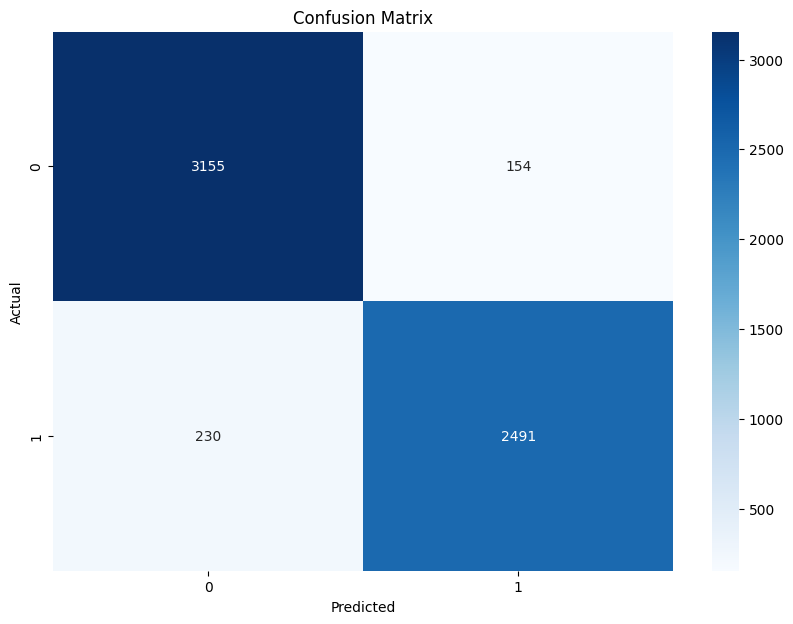

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3309
           1       0.94      0.92      0.93      2721

    accuracy                           0.94      6030
   macro avg       0.94      0.93      0.94      6030
weighted avg       0.94      0.94      0.94      6030



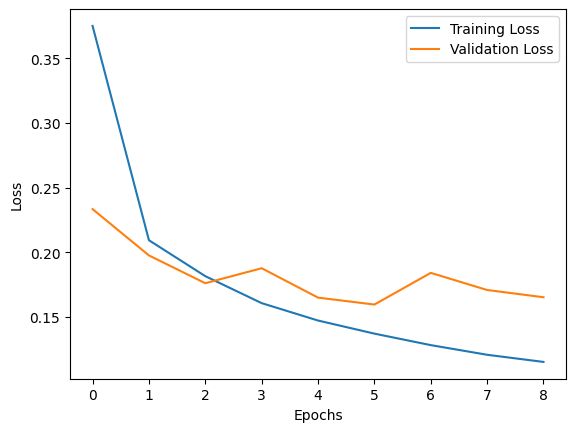

In [46]:
# Train and evaluate the LSTM model
# The vocabulary size is reduced to 1000 to reduce the number of words in the dataset
lstm_model = train_evaluate_lstm_model(X_train, y_train, max_length=max_length, reduced_vocabulary_size=1000)